# Passo 1: setup do projeto

In [4]:
import joblib
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm  import SVC
from sklearn.tree import DecisionTreeClassifier

print('Matplot version : {}'.format(matplotlib.__version__))
print('Numpy version : {}'.format(np.__version__))
print('Pandas version : {}'.format(pd.__version__))
print('Sklearn version : {}'.format(sklearn.__version__))

Matplot version : 3.3.2
Numpy version : 1.19.2
Pandas version : 1.1.3
Sklearn version : 0.23.2


In [5]:
WINE_ROOT = "https://archive.ics.uci.edu/ml/datasets/wine/"
WINE_URL = WINE_ROOT + "wine.data"

DATA_PATH = os.path.join('..','data','raw')
DATA_FILE = 'wine.csv'
WINE_DATA = os.path.join(DATA_PATH, DATA_FILE)

DEPLOY_PATH = os.path.join('..','app','model')
DEPLOY_FILE = 'finalized_model.sav'

RS = 42

# Passo 2: recuperação dos dados 

In [6]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash',
           'Magnesium','Total phenols','Flavanoids', 'Nonflavanoid phenols',
           'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline']
    return pd.read_csv(local_path, header=None, names=names)

In [7]:
wine_data = load_data(DATA_PATH, DATA_FILE)

# Passo 3: análise exploratória de dados

In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [9]:
wine_data.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
wine_data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Correlação e distribuição

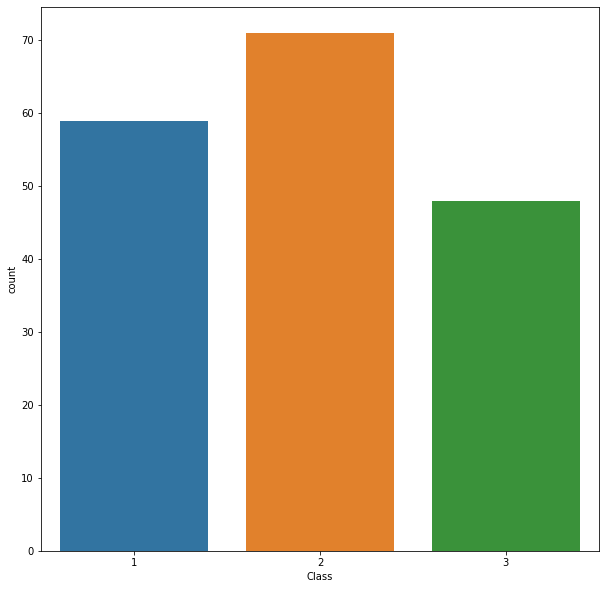

In [11]:
plt.figure(figsize=(10,10))
_ = sns.countplot(x='Class',data=wine_data)

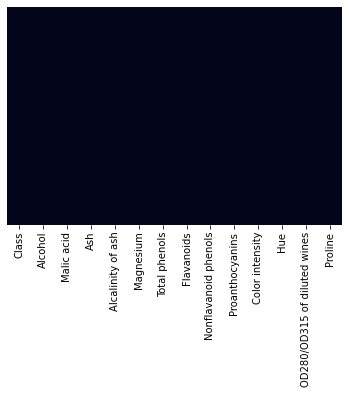

In [12]:
_ = sns.heatmap(wine_data.isnull(), yticklabels=False, cbar=False)

In [13]:
x = wine_data.drop(['Class'],axis=1)
y = wine_data['Class']

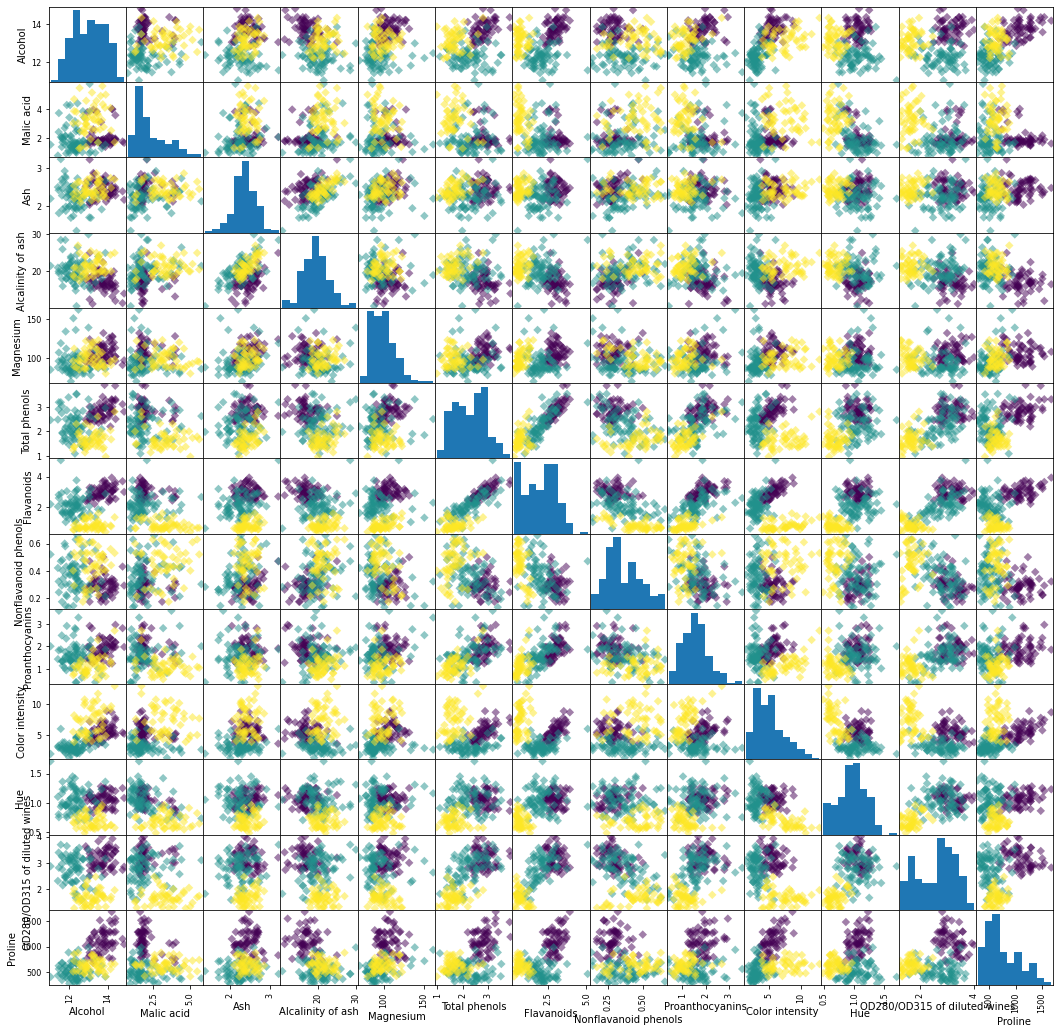

In [14]:
_ = pd.plotting.scatter_matrix(x, c=y, figsize=[18,18],marker='D')

# Passo 4: Trasnformação dos dados

In [15]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler() 
X_scaled = pd.DataFrame(scaler.fit_transform(x))
X_scaled.columns = x.columns

#scaler = StandardScaler() 
#X_scaled = pd.DataFrame(scaler.fit_transform(X))
#X_scaled.columns = X.columns

# Passo 5: Treinamento do Modelo

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, stratify=y, random_state=RS)

In [17]:
def build_classifiers():
    
    classifiers = []
    classifiers.append(
        ('knn',
        KNeighborsClassifier(),
        {'n_neighbors': range(1, 33, 2)})
    )
    
    classifiers.append(
        ('lr',
        LogisticRegression(max_iter=1000),
        {'penalty': ['l2'], 'C': [100,10,1, 0.1,0.01]})
    )
    
    classifiers.append(
        ('svm',
        SVC(),
        {'C': [2**(-5),1,2**5,2**10],
        'gamma': [2**(-15),2**(-10),2**(-5),1, 2**5]})
    )
    
    classifiers.append(
        ('dt',
        DecisionTreeClassifier(),
        {'max_depth': [2,4,6,8,10,12]})
    )
    
    classifiers.append(
        ('rf',
        RandomForestClassifier(),
        {'n_estimators': [10,50,100]})
    )
    
    classifiers.append(
        ('gpc',                              
        GaussianProcessClassifier(), 
        {'kernel':[1.0 * RBF(1.0)]})   
    )
    
    return classifiers

In [18]:
classifiers = build_classifiers()

In [19]:
results = []
names = []
for name, model, parameters in classifiers:
    print(">> classifier name: {}".format(name))
    gs = GridSearchCV(estimator=model,param_grid=parameters,refit=True, verbose=0)
    kf = KFold(n_splits=10, shuffle=True, random_state=RS)
    cv = cross_val_score(gs, x_train, y_train, cv=kf, scoring='accuracy')
    print('Mean: {}, Standart Deviation: {}'.format(cv.mean(),cv.std()))
    results.append(cv)
    names.append(name)

>> classifier name: knn
Mean: 0.9673076923076923, Standart Deviation: 0.054727974714080745
>> classifier name: lr
Mean: 0.9756410256410255, Standart Deviation: 0.03724574114444603
>> classifier name: svm
Mean: 0.9916666666666666, Standart Deviation: 0.025000000000000012
>> classifier name: dt
Mean: 0.8538461538461538, Standart Deviation: 0.09958823838942796
>> classifier name: rf
Mean: 0.9589743589743589, Standart Deviation: 0.04106568558473583
>> classifier name: gpc
Mean: 0.9756410256410255, Standart Deviation: 0.03724574114444603


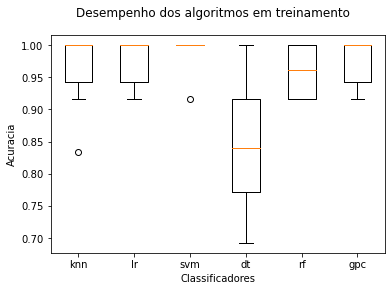

In [20]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho dos algoritmos em treinamento')
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_xlabel('Classificadores')
ax.set_ylabel('Acuracia')
plt.show()

# Passo 6: Testar o Modelo

In [23]:
classifiers = build_classifiers()
test_results = []
names = []

for name, model, parameters in classifiers:
    gs = GridSearchCV(estimator=model,param_grid=parameters, refit=True, verbose=0)
    gs.fit(x_train,y_train)
    y_pred = gs.predict(x_test)
    test_accuracy = gs.score(x_test, y_test)
    print("Acurácia do modelo {} em Teste: {}".format(name,test_accuracy))
    print(classification_report(y_test,y_pred))
    names.append(name)
    test_results.append(test_accuracy)

Acurácia do modelo knn em Teste: 0.9444444444444444
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.86      0.92        21
           3       0.88      1.00      0.94        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Acurácia do modelo lr em Teste: 0.9814814814814815
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Acurácia do modelo svm em Teste: 0.9629629629629629
              precision    recall  f1-score   support

           1       0.95     

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


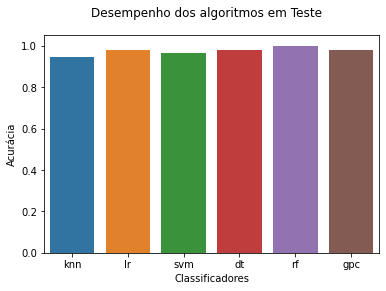

In [26]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho dos algoritmos em Teste')
ax.set_xlabel('Classificadores')
ax.set_ylabel('Acurácia')
_ = sns.barplot(names, test_results)

# Passo 6: avaliação do modelo

In [27]:
# Se formos analisar os informações obtidas apenas no teste eu escolheria o RandomForest como o melhor classificador
# Porém analisando treino e teste resolvi escolher o DecisionTree isso porque ele fica próximo de 100% de acurácia
# tanto em treino como em teste

# Passo 7: Deploy do modelo

In [29]:
model = DecisionTreeClassifier(max_depth= [2,4,6,8,10,12])

In [30]:
local_path = os.path.join(DEPLOY_PATH, DEPLOY_FILE)
joblib.dump(model, local_path)

['..\\app\\model\\finalized_model.sav']